# Import thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tổng quan tập dữ liệu

In [14]:
data_name = "berlin_weekends.csv"

In [15]:
path = f"../data/root_data/airbnb/{data_name}"
resolved_file_path = f"../data/resolved_data/airbnb/{data_name}"

In [16]:
df = pd.read_csv(path, sep=',')
print("Kích thước dữ liệu:", df.shape)

Kích thước dữ liệu: (1200, 20)


In [17]:
# Thông tin cơ bản
print("===== Thông tin cơ bản =====")
print(df.info())
print("\n===== 5 dòng đầu tiên =====")
print(df.head())


===== Thông tin cơ bản =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1200 non-null   int64  
 1   realSum                     1200 non-null   float64
 2   room_type                   1200 non-null   object 
 3   room_shared                 1200 non-null   bool   
 4   room_private                1200 non-null   bool   
 5   person_capacity             1200 non-null   int64  
 6   host_is_superhost           1200 non-null   bool   
 7   multi                       1200 non-null   int64  
 8   biz                         1200 non-null   int64  
 9   cleanliness_rating          1200 non-null   float64
 10  guest_satisfaction_overall  1200 non-null   float64
 11  bedrooms                    1200 non-null   int64  
 12  dist                        1200 non-null   float64
 13  metr

In [18]:
# Thống kê numeric
print("\n===== Thống kê numeric =====")
print(df.describe())


===== Thống kê numeric =====
        Unnamed: 0      realSum  person_capacity        multi          biz  \
count  1200.000000  1200.000000      1200.000000  1200.000000  1200.000000   
mean    599.500000   249.252516         2.748333     0.276667     0.165000   
std     346.554469   240.584178         1.157345     0.447537     0.371335   
min       0.000000    64.971487         2.000000     0.000000     0.000000   
25%     299.750000   147.237543         2.000000     0.000000     0.000000   
50%     599.500000   192.460503         2.000000     0.000000     0.000000   
75%     899.250000   286.762644         3.000000     1.000000     0.000000   
max    1199.000000  5856.081144         6.000000     1.000000     1.000000   

       cleanliness_rating  guest_satisfaction_overall     bedrooms  \
count         1200.000000                 1200.000000  1200.000000   
mean             9.447500                   94.350000     1.055833   
std              0.864793                    6.700242    

In [19]:
print(df['room_type'].unique())

['Private room' 'Entire home/apt' 'Shared room']


In [20]:
# Kiểm tra missing values
print("\n===== Missing values =====")
print(df.isnull().sum())


===== Missing values =====
Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64


In [21]:
# Thống kê categorical
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
print("\n===== Thống kê categorical =====")
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())


===== Thống kê categorical =====

--- room_type ---
room_type
Private room       754
Entire home/apt    408
Shared room         38
Name: count, dtype: int64

--- room_shared ---
room_shared
False    1162
True       38
Name: count, dtype: int64

--- room_private ---
room_private
True     754
False    446
Name: count, dtype: int64

--- host_is_superhost ---
host_is_superhost
False    903
True     297
Name: count, dtype: int64


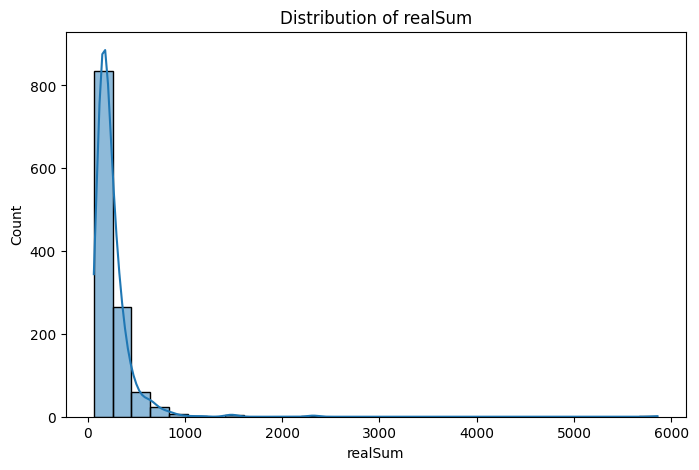

In [22]:
# Phân phối target (realSum)
plt.figure(figsize=(8,5))
sns.histplot(df['realSum'], bins=30, kde=True)
plt.title("Distribution of realSum")
plt.show()

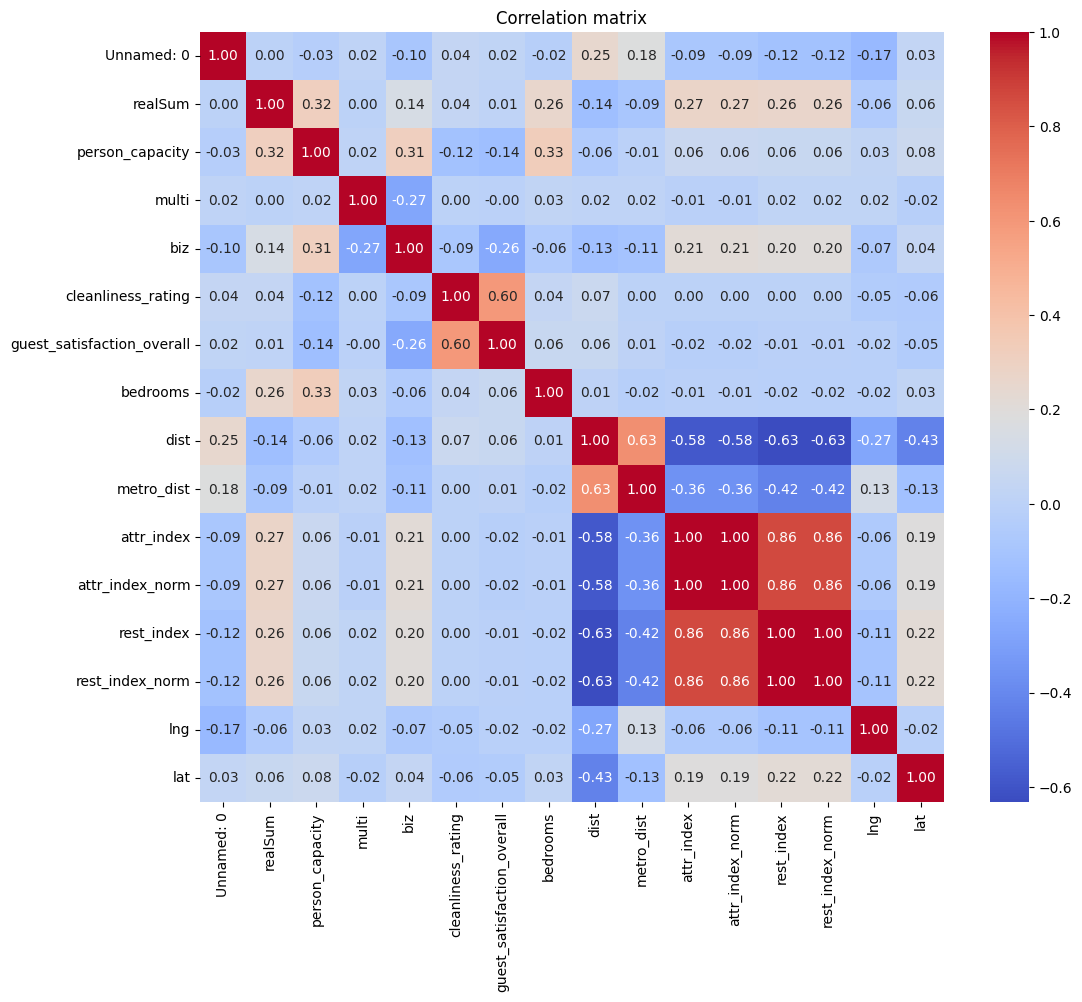

In [23]:
# Biểu đồ correlation numeric features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

# Tiền xử lý dữ liệu

In [24]:
df['room_type'] = df['room_type'].map({
    'Entire home/apt': 0,
    'Private room': 1,
    'Shared room': 2
})

bool_cols = ['room_shared', 'room_private', 'host_is_superhost']
df[bool_cols] = df[bool_cols].astype(int)

print(df.head(5))

   Unnamed: 0     realSum  room_type  room_shared  room_private  \
0           0  185.799757          1            0             1   
1           1  387.491820          0            0             0   
2           2  194.914462          1            0             1   
3           3  171.777134          1            0             1   
4           4  207.768533          1            0             1   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                2                  1      0    0                10.0   
1                6                  0      0    1                10.0   
2                5                  0      0    1                 9.0   
3                2                  0      0    0                 9.0   
4                3                  1      0    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        98.0         1  3.582222    0.174708  105.063613   
1   

In [25]:
# Xuất ra CSV
df.to_csv(resolved_file_path, index=False, sep=';')
print(f"✅ Dữ liệu đã xử lý được lưu tại: {resolved_file_path}")

✅ Dữ liệu đã xử lý được lưu tại: ../data/resolved_data/airbnb/berlin_weekends.csv
